## Accidents corporels de la route en 2019
### Ouverture de la base de données

Faire les importations nécessaires :

In [23]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib as plt
import graphviz

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree

Importer les 4 fichiers :

In [8]:
df_carac = pd.read_csv("/Users/cloclo/Desktop/Python/Accidents_corporels_route/caracteristiques-2019.csv", sep = ";")
df_lieux = pd.read_csv("/Users/cloclo/Desktop/Python/Accidents_corporels_route/lieux-2019.csv", sep = ";")
df_usager = pd.read_csv("/Users/cloclo/Desktop/Python/Accidents_corporels_route/usagers-2019.csv", sep = ";")
df_vehicules = pd.read_csv("/Users/cloclo/Desktop/Python/Accidents_corporels_route/vehicules-2019.csv", sep = ";")

Sélectionner les variables importantes :

In [10]:
df_carac = df_carac[["Num_Acc", "an", "hrmn", "lum", "dep", "agg", "atm", "com", "col", "lat", "long"]]
df_lieux = df_lieux[["Num_Acc", "catr", "circ", "nbv", "surf", "infra", "situ", "vma"]] 
df_vehicules = df_vehicules[["Num_Acc", "id_vehicule"]] 
df_usager = df_usager[["Num_Acc", "id_vehicule", "place", "catu", "sexe", "grav", "an_nais", "trajet", "secu1"]] 

Fusionner les 4 bases de données :

In [14]:
df = df_usager.merge(df_lieux, on=['Num_Acc'])
df = df.merge(df_carac, on=['Num_Acc'])

### Statistiques univariées

In [15]:
df.head(5)

,Num_Acc,id_vehicule,place,catu,sexe,grav,an_nais,trajet,secu1,catr,...,an,hrmn,lum,dep,agg,atm,com,col,lat,long
0,201900000001,138 306 524,2,2,2,4,2002,0,1,1,...,2019,01:30,4,93,1,1,93053,2,"48,8962100","2,4701200"
1,201900000001,138 306 524,1,1,2,4,1993,5,1,1,...,2019,01:30,4,93,1,1,93053,2,"48,8962100","2,4701200"
2,201900000001,138 306 525,1,1,1,1,1959,0,1,1,...,2019,01:30,4,93,1,1,93053,2,"48,8962100","2,4701200"
3,201900000002,138 306 523,1,1,2,4,1994,0,1,1,...,2019,02:50,3,93,1,1,93066,6,"48,9307000","2,3688000"
4,201900000003,138 306 520,1,1,1,1,1996,0,1,1,...,2019,15:15,1,92,1,1,92036,4,"48,9358718","2,3191744"


In [16]:
df.place.value_counts()

1     96935
2     15495
10    11265
3      2530
4      2301
9      1539
7      1355
5       763
8       619
6       175
Name: place, dtype: int64

In [17]:
df.catu.value_counts()

1    97356
2    24356
3    11265
Name: catu, dtype: int64

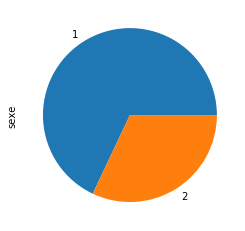

In [8]:
df_usager["sexe"].value_counts().plot(kind = 'pie')

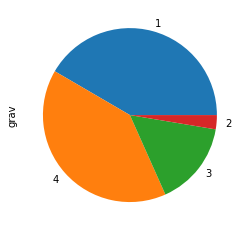

In [9]:
df_usager["grav"].value_counts().plot(kind = 'pie')

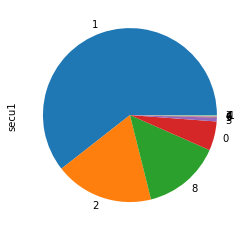

In [11]:
df_usager["secu1"].value_counts().plot(kind = 'pie')

In [18]:
df_usager.groupby("sexe").grav.value_counts()

sexe  grav
1     1       39676
      4       33324
      3       14662
      2        2722
2     4       19983
      1       15638
      3        6196
      2         776
Name: grav, dtype: int64

AxesSubplot(0.260833,0.125;0.503333x0.755)


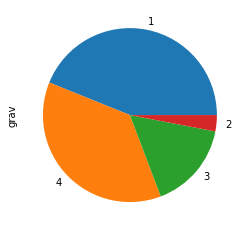

In [26]:
print(df_usager[df_usager.sexe == 1].grav.value_counts().plot(kind = 'pie'))

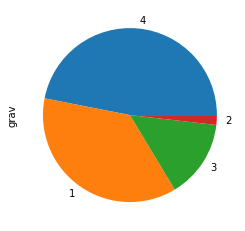

In [27]:
df_usager[df_usager.sexe == 2].grav.value_counts().plot(kind = 'pie')

In [38]:
y = df_usager["sexe"].astype('category').cat.codes
x = df_usager[["grav", "catu", "secu1"]]
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
pd.DataFrame(np.concatenate([modele_logit.intercept_.reshape(-1,1),
                             modele_logit.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(x.columns)).T

,coef
constante,-1.821231
grav,0.077058
catu,0.730491
secu1,-0.067400


In [37]:
modele_logit.coef_

array([[ 0.11320014, -0.65869281, -0.08296658],
       [-0.42680994,  0.24908238,  0.01211283],
       [-0.02923336,  0.23763962,  0.02708436],
       [ 0.34284316,  0.17197081,  0.04376939]])

### Arbre de décision

In [19]:
X = df[["sexe", "catu", "place", "trajet", "atm"]]
y = df.grav

In [35]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(X, y)

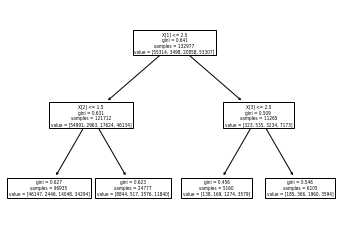

In [37]:
tree.plot_tree(clf)
essai = tree.export_graphviz(clf, out_file="essai.pdf") 
#graph = graphviz.Source(essai)
#graph